In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#한글 폰트 안깨지게 설정
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

### 데이터 불러오기(2013-01~2023-09)

In [3]:
data = pd.read_csv('../응용통계특수연구/data/data.csv', encoding='cp949')
data.head()

,Date,기준금리,주택건설인허가실적,전산업생산지수,주택담보대출금리,건설업_업황전망,건설업_매출전망,건설업_자금사전전망,소비자물가지수,생산자물가지수,...,국고채(30년),회사채(3년),KOSPI_종가,KOSDAQ_종가,국채 거래량,회사채 거래량,GDP,주택전세가격지수,환율,주택매매가격지수
0,13-Jan,2.75,23952,62.2697,4.55,56,68,62,92.728,104.96,...,3.31,3.20,1961.94,503.67,121500624,573916,0.9,82.7,1066.54,70.462
1,13-Feb,2.75,45543,61.6258,4.51,52,76,77,93.038,105.68,...,3.30,3.06,2026.49,535.87,99040466,422222,0.9,82.9,1086.06,70.421
2,13-Mar,2.75,75594,76.0634,4.46,58,68,72,92.952,105.26,...,3.17,2.95,2004.89,555.02,104760077,481596,0.9,83.2,1103.81,70.389
3,13-Apr,2.75,106509,80.5564,4.40,61,71,74,92.823,104.93,...,3.15,2.91,1963.95,563.87,110564496,335381,1.2,83.6,1121.10,70.391
4,13-May,2.50,142055,81.3058,4.33,58,74,70,92.823,104.57,...,3.17,2.96,2001.05,577.87,117919540,531677,1.2,83.8,1112.10,70.381


In [4]:
from datetime import datetime
# 주어진 문자열
date_str = '13-Jan'

# 문자열을 datetime 객체로 변환
date_obj = datetime.strptime(date_str, '%y-%b')
print(date_obj)

2013-01-01 00:00:00


In [5]:
from datetime import datetime
for i in range(len(data)):
    data['Date'][i] = datetime.strptime(data['Date'][i], '%y-%b')
data.head()

C:\Users\장희중학부재학통계학과\AppData\Local\Temp\ipykernel_27716\1366291810.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'][i] = datetime.strptime(data['Date'][i], '%y-%b')


,Date,기준금리,주택건설인허가실적,전산업생산지수,주택담보대출금리,건설업_업황전망,건설업_매출전망,건설업_자금사전전망,소비자물가지수,생산자물가지수,...,국고채(30년),회사채(3년),KOSPI_종가,KOSDAQ_종가,국채 거래량,회사채 거래량,GDP,주택전세가격지수,환율,주택매매가격지수
0,2013-01-01 00:00:00,2.75,23952,62.2697,4.55,56,68,62,92.728,104.96,...,3.31,3.20,1961.94,503.67,121500624,573916,0.9,82.7,1066.54,70.462
1,2013-02-01 00:00:00,2.75,45543,61.6258,4.51,52,76,77,93.038,105.68,...,3.30,3.06,2026.49,535.87,99040466,422222,0.9,82.9,1086.06,70.421
2,2013-03-01 00:00:00,2.75,75594,76.0634,4.46,58,68,72,92.952,105.26,...,3.17,2.95,2004.89,555.02,104760077,481596,0.9,83.2,1103.81,70.389
3,2013-04-01 00:00:00,2.75,106509,80.5564,4.40,61,71,74,92.823,104.93,...,3.15,2.91,1963.95,563.87,110564496,335381,1.2,83.6,1121.10,70.391
4,2013-05-01 00:00:00,2.50,142055,81.3058,4.33,58,74,70,92.823,104.57,...,3.17,2.96,2001.05,577.87,117919540,531677,1.2,83.8,1112.10,70.381


In [6]:
# 'Date' 열을 인덱스로 설정
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129 entries, 2013-01-01 to 2023-09-01
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   기준금리        129 non-null    float64
 1   주택건설인허가실적   129 non-null    int64  
 2   전산업생산지수     129 non-null    float64
 3   주택담보대출금리    129 non-null    float64
 4   건설업_업황전망    129 non-null    int64  
 5   건설업_매출전망    129 non-null    int64  
 6   건설업_자금사전전망  129 non-null    int64  
 7   소비자물가지수     129 non-null    float64
 8   생산자물가지수     129 non-null    float64
 9   미분양주택현황     129 non-null    int64  
 10  실업률         129 non-null    float64
 11  고용률         129 non-null    float64
 12  M2          129 non-null    int64  
 13  CD금리        129 non-null    float64
 14  국고채(3년)     129 non-null    float64
 15  국고채(10년)    129 non-null    float64
 16  국고채(30년)    129 non-null    float64
 17  회사채(3년)     129 non-null    float64
 18  KOSPI_종가    129 non-null    float64
 19  KOSDAQ_종가 

In [8]:
data.columns

Index(['기준금리', '주택건설인허가실적', '전산업생산지수', '주택담보대출금리', '건설업_업황전망', '건설업_매출전망',
       '건설업_자금사전전망', '소비자물가지수', '생산자물가지수', '미분양주택현황', '실업률', '고용률', 'M2',
       'CD금리', '국고채(3년)', '국고채(10년)', '국고채(30년)', '회사채(3년)', 'KOSPI_종가',
       'KOSDAQ_종가', '국채 거래량', '회사채 거래량', 'GDP', '주택전세가격지수', '환율', '주택매매가격지수'],
      dtype='object')

<AxesSubplot:xlabel='Date'>

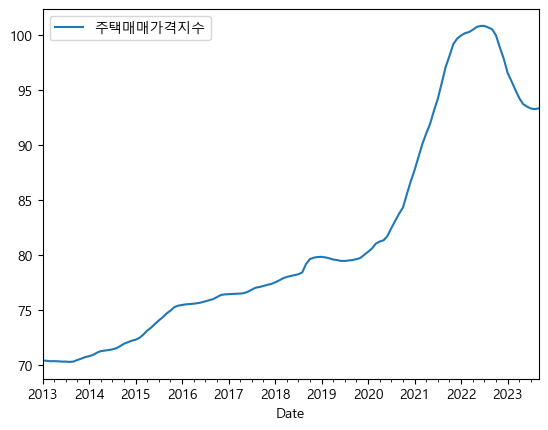

In [9]:
data[['주택매매가격지수']].plot() 

### Scaling

In [10]:
train = data[:int(len(data)*0.97)] # 2013-01 ~ 2023-05
test = data[int(len(data)*0.97):] # 2023-06 ~ 2023-09
train_X = train.iloc[:,:-1]
test_X = test.iloc[:,:-1]
train_y = train.loc[:,'주택매매가격지수']
test_y = test.loc[:, '주택매매가격지수']

In [11]:
train_X

,기준금리,주택건설인허가실적,전산업생산지수,주택담보대출금리,건설업_업황전망,건설업_매출전망,건설업_자금사전전망,소비자물가지수,생산자물가지수,미분양주택현황,...,국고채(10년),국고채(30년),회사채(3년),KOSPI_종가,KOSDAQ_종가,국채 거래량,회사채 거래량,GDP,주택전세가격지수,환율
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,2.75,23952,62.2697,4.55,56,68,62,92.728,104.96,75180,...,3.050,3.310,3.200,1961.94,503.67,121500624,573916,0.9,82.7,1066.54
2013-02-01,2.75,45543,61.6258,4.51,52,76,77,93.038,105.68,73386,...,3.040,3.300,3.060,2026.49,535.87,99040466,422222,0.9,82.9,1086.06
2013-03-01,2.75,75594,76.0634,4.46,58,68,72,92.952,105.26,70633,...,2.910,3.170,2.950,2004.89,555.02,104760077,481596,0.9,83.2,1103.81
2013-04-01,2.75,106509,80.5564,4.40,61,71,74,92.823,104.93,70201,...,2.840,3.150,2.910,1963.95,563.87,110564496,335381,1.2,83.6,1121.10
2013-05-01,2.50,142055,81.3058,4.33,58,74,70,92.823,104.57,66896,...,2.900,3.170,2.960,2001.05,577.87,117919540,531677,1.2,83.8,1112.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01,3.50,21425,86.3587,3.96,59,77,67,110.100,120.25,75359,...,3.411,3.414,4.704,2425.08,740.49,51592358,310751,0.3,95.2,1245.34
2023-02-01,3.50,54375,89.9543,4.05,55,72,63,110.380,120.46,75438,...,3.450,3.379,4.274,2412.85,791.60,75680335,253269,0.3,93.5,1276.54
2023-03-01,3.50,86444,106.8551,4.12,56,70,68,110.560,120.59,72104,...,3.448,3.383,4.184,2476.86,847.52,95460196,394640,0.3,92.4,1305.40


In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X_sc = pd.DataFrame(sc.fit_transform(train_X), columns=train_X.columns, index=train_X.index)
test_X_sc = pd.DataFrame(sc.transform(test_X), columns=test_X.columns, index = test_X.index)

In [13]:
train_sc = pd.concat([train_X_sc, pd.DataFrame(train_y)], axis=1)
test_sc = pd.concat([test_X_sc, pd.DataFrame(test_y)], axis=1)
data_sc = pd.concat([train_sc, test_sc], axis=0)

In [14]:
data_sc

,기준금리,주택건설인허가실적,전산업생산지수,주택담보대출금리,건설업_업황전망,건설업_매출전망,건설업_자금사전전망,소비자물가지수,생산자물가지수,미분양주택현황,...,국고채(30년),회사채(3년),KOSPI_종가,KOSDAQ_종가,국채 거래량,회사채 거래량,GDP,주택전세가격지수,환율,주택매매가격지수
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1.443119,-1.402773,-2.152601,2.551122,-1.638766,-1.153892,-2.898026,-1.294490,-0.058923,1.569364,...,1.064033,0.709768,-0.857986,-1.517652,-0.479211,1.912407,0.308016,-2.224418,-1.119000,70.462
2013-02-01,1.443119,-1.279807,-2.194976,2.470344,-2.212564,0.045580,-0.237008,-1.229603,0.055048,1.466210,...,1.050481,0.538831,-0.672891,-1.288198,-0.786541,0.709071,0.308016,-2.184185,-0.861182,70.421
2013-03-01,1.443119,-1.108659,-1.244831,2.369372,-1.351867,-1.153892,-1.124014,-1.247604,-0.011435,1.307914,...,0.874298,0.404524,-0.734828,-1.151736,-0.708277,1.180065,0.308016,-2.123835,-0.626743,70.389
2013-04-01,1.443119,-0.932591,-0.949144,2.248205,-0.921519,-0.704090,-0.769212,-1.274606,-0.063671,1.283074,...,0.847193,0.355685,-0.852222,-1.088672,-0.628854,0.020191,0.667848,-2.043368,-0.398379,70.391
2013-05-01,1.114540,-0.730148,-0.899826,2.106844,-1.351867,-0.254288,-1.478816,-1.274606,-0.120657,1.093039,...,0.874298,0.416734,-0.745840,-0.988909,-0.528212,1.577340,0.667848,-2.003135,-0.517250,70.381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,2.428856,-0.641991,0.443833,1.824122,0.226076,0.345448,-1.478816,2.557288,2.326542,1.206255,...,1.242926,1.856264,0.906019,0.999724,-0.522778,-0.649817,-0.051816,-0.434037,2.333400,93.766
2023-06-01,2.428856,-0.461571,1.370471,1.864511,-0.060823,0.495382,-1.656217,2.555194,2.285386,1.063829,...,1.537015,2.121215,0.869201,1.080246,-0.324142,-0.203573,-0.051816,-0.474270,1.918938,93.536
2023-07-01,2.428856,-0.358687,0.102836,1.864511,0.226076,0.645316,-0.237008,2.571939,2.334457,0.874024,...,1.507200,2.220115,1.065048,1.562885,-0.565124,0.120389,-0.051816,-0.474270,1.742877,93.360


## VAR

<AxesSubplot:xlabel='Date'>

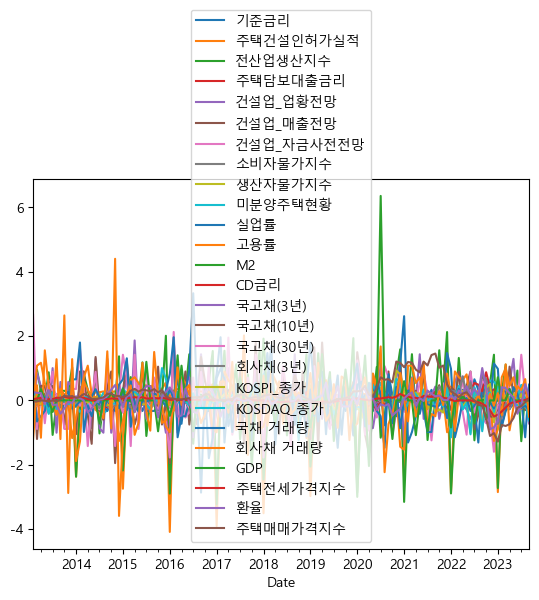

In [15]:
diff1_data = data_sc.diff().dropna()
diff1_data.plot()

In [16]:
from statsmodels.tsa.stattools import adfuller

# Stationarity Check
# (H0): non-stationary
# (H1): stationary

def adf(time_series):
  result = adfuller(time_series.values)
  print('ADF Statistic: {:.4f}'.format(result[0]))
  print('p-value: {:.4f}'.format(result[1]))

for i in diff1_data:
  print('--Test statistic for %s' % i)
  adf(diff1_data[i])
  print() # 몇몇 변수가 정상성 만족하지 않으므로 한번 더 차분

--Test statistic for 기준금리
ADF Statistic: -3.1247
p-value: 0.0248

--Test statistic for 주택건설인허가실적
ADF Statistic: -2.1124
p-value: 0.2395

--Test statistic for 전산업생산지수
ADF Statistic: -1.5455
p-value: 0.5109

--Test statistic for 주택담보대출금리
ADF Statistic: -2.2629
p-value: 0.1842

--Test statistic for 건설업_업황전망
ADF Statistic: -10.7813
p-value: 0.0000

--Test statistic for 건설업_매출전망
ADF Statistic: -9.3965
p-value: 0.0000

--Test statistic for 건설업_자금사전전망
ADF Statistic: -4.7179
p-value: 0.0001

--Test statistic for 소비자물가지수
ADF Statistic: -1.8628
p-value: 0.3497

--Test statistic for 생산자물가지수
ADF Statistic: -2.4317
p-value: 0.1330

--Test statistic for 미분양주택현황
ADF Statistic: -5.9440
p-value: 0.0000

--Test statistic for 실업률
ADF Statistic: -2.9207
p-value: 0.0430

--Test statistic for 고용률
ADF Statistic: -2.6528
p-value: 0.0826

--Test statistic for M2
ADF Statistic: -2.8474
p-value: 0.0518

--Test statistic for CD금리
ADF Statistic: -5.6829
p-value: 0.0000

--Test statistic for 국고채(3년)
ADF Statistic: 

--Test statistic for 기준금리
ADF Statistic: -17.6397
p-value: 0.0000

--Test statistic for 주택건설인허가실적
ADF Statistic: -55.0818
p-value: 0.0000

--Test statistic for 전산업생산지수
ADF Statistic: -7.6028
p-value: 0.0000

--Test statistic for 주택담보대출금리
ADF Statistic: -9.2814
p-value: 0.0000

--Test statistic for 건설업_업황전망
ADF Statistic: -5.4866
p-value: 0.0000

--Test statistic for 건설업_매출전망
ADF Statistic: -7.5730
p-value: 0.0000

--Test statistic for 건설업_자금사전전망
ADF Statistic: -7.2837
p-value: 0.0000

--Test statistic for 소비자물가지수
ADF Statistic: -5.4350
p-value: 0.0000

--Test statistic for 생산자물가지수
ADF Statistic: -8.5650
p-value: 0.0000

--Test statistic for 미분양주택현황
ADF Statistic: -8.2045
p-value: 0.0000

--Test statistic for 실업률
ADF Statistic: -10.9734
p-value: 0.0000

--Test statistic for 고용률
ADF Statistic: -7.6731
p-value: 0.0000

--Test statistic for M2
ADF Statistic: -9.2637
p-value: 0.0000

--Test statistic for CD금리
ADF Statistic: -7.1060
p-value: 0.0000

--Test statistic for 국고채(3년)
ADF Statistic

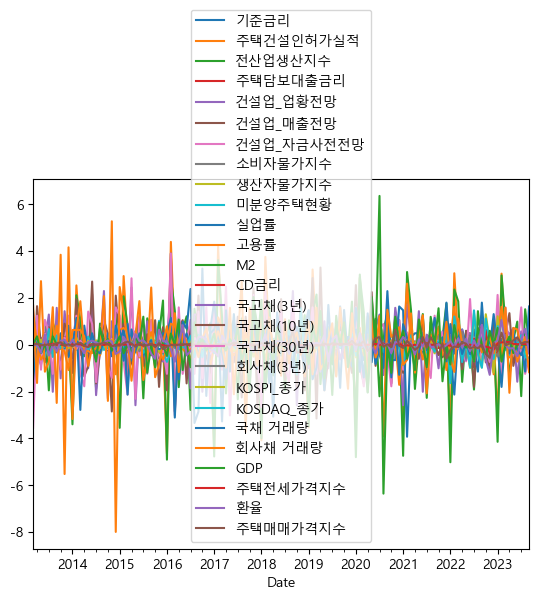

In [17]:
diff2_data = diff1_data.diff().dropna()
diff2_data.plot()
for i in diff2_data:
  print('--Test statistic for %s' % i)
  adf(diff2_data[i])
  print() # 모든 변수가 정상성을 만족함

In [19]:
# train, test 분리
X_train_diff2 = diff2_data[:int(len(diff2_data)*0.9)]
X_test_diff2 = diff2_data[int(len(diff2_data)*0.9):]

print(X_train_diff2.shape, X_test_diff2.shape) # train:2013-03 ~ 2022-08 / test: 2022-09 ~ 2023-09

(114, 26) (13, 26)


In [20]:
X_train_diff2

,기준금리,주택건설인허가실적,전산업생산지수,주택담보대출금리,건설업_업황전망,건설업_매출전망,건설업_자금사전전망,소비자물가지수,생산자물가지수,미분양주택현황,...,국고채(30년),회사채(3년),KOSPI_종가,KOSDAQ_종가,국채 거래량,회사채 거래량,GDP,주택전세가격지수,환율,주택매매가격지수
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-01,0.000000,0.048182,0.992521,-2.019443e-02,1.434494,-2.398944e+00,-3.548024,-0.082888,-1.804532e-01,-0.055142,...,-0.162630,0.036629,-0.247032,-0.092993,0.385593,1.674330,0.000000,2.011664e-02,-0.023378,0.009
2013-04-01,0.000000,0.004921,-0.654459,-2.019443e-02,-0.430348,1.649274e+00,1.241808,-0.009000,1.424631e-02,0.133456,...,0.149077,0.085468,-0.055457,-0.073397,0.001160,-1.630867,0.359832,2.011664e-02,-0.006076,0.034
2013-05-01,-0.328579,0.026375,-0.246368,-2.019443e-02,-0.860696,5.551115e-17,-1.064407,0.027001,-4.748769e-03,-0.165196,...,0.054210,0.109888,0.223777,0.036699,0.021218,2.717022,-0.359832,-4.023329e-02,-0.347234,-0.012
2013-06-01,0.328579,0.015161,0.824224,2.220446e-16,0.143449,-7.496700e-01,1.064407,-0.023652,5.381938e-02,0.085157,...,0.487890,0.280824,-0.501318,-0.518839,-0.286023,-1.149878,0.000000,2.220446e-16,0.442331,-0.018
2013-07-01,0.000000,-0.011123,-1.945832,2.019443e-02,1.291045,7.496700e-01,0.532204,0.065306,-2.775558e-17,0.254377,...,-0.216840,-0.170937,0.540344,0.670265,0.164385,-0.727686,-0.359832,-2.220446e-16,-0.461350,0.026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,0.328579,0.036484,-1.584308,-8.881784e-16,-1.004146,-1.049538e+00,-0.354802,0.006279,2.216092e-02,-0.202053,...,0.479758,0.546997,-0.347164,-0.735681,-0.395708,-0.004387,0.119944,0.000000e+00,-0.128116,0.112
2022-05-01,0.000000,-0.001959,0.585601,1.110223e-16,-0.143449,5.997360e-01,-0.709605,-0.016745,-1.662069e-01,0.056867,...,-0.512284,-0.560428,0.153266,0.202305,0.112273,0.060217,-0.119944,0.000000e+00,0.257157,0.040
2022-06-01,-0.328579,0.014153,0.351968,4.038886e-02,-0.286899,4.498020e-01,1.951413,-0.010466,-2.690969e-02,0.019550,...,0.258853,0.383386,-0.986722,-0.972903,-0.402464,-0.222598,0.000000,0.000000e+00,-0.275252,-0.150


In [21]:
# VAR 모델링 
from statsmodels.tsa.api import VAR
endogeneous_var = X_train_diff2.iloc[:,1:] # 기준금리 외 모든 변수는 내생변수
exogeneous_var = X_train_diff2.iloc[:,0] # 기준금리를 외생변수로 설정 
model_var = VAR(endog=endogeneous_var, exog=exogeneous_var)

var_fit = model_var.fit(maxlags=3, ic='aic')

var_fit.summary()

c:\Anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 02, Dec, 2023
Time:                     20:04:30
--------------------------------------------------------------------
No. of Equations:         25.0000    BIC:                   -52.8296
Nobs:                     111.000    HQIC:                  -80.7569
Log likelihood:           3527.41    FPE:                1.42127e-40
AIC:                     -99.8192    Det(Omega_mle):     2.70275e-46
--------------------------------------------------------------------
Results for equation 주택건설인허가실적
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.017326         0.044586            0.389           0.698
기준금리                 -0.761189         0.581343           -1.309           0.190
L1.주택건설인허가실적         -0.376520         0.162442         

<AxesSubplot:xlabel='Date'>

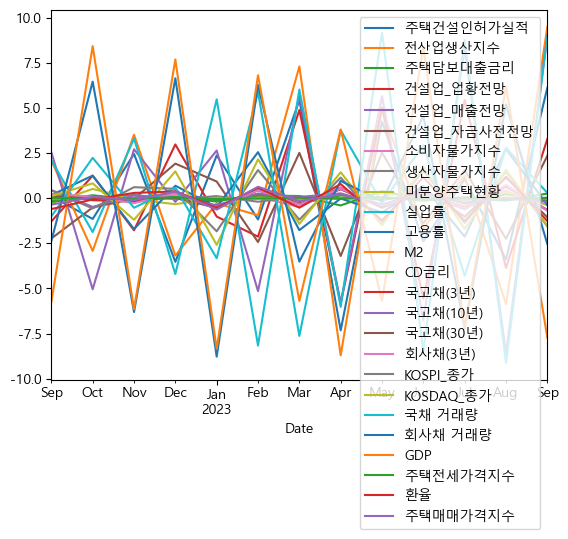

In [22]:
# Forecasting using the VAR model
lag_order = var_fit.k_ar
forecast_input = X_train_diff2.iloc[:,1:].values[-lag_order:]
forecast_steps = len(X_test_diff2)

# Forecasting
forecast = var_fit.forecast(y=forecast_input, steps=forecast_steps, exog_future=exogeneous_var[-forecast_steps:])
forecast_df = pd.DataFrame(forecast, index=X_test_diff2.iloc[:,1:].index, columns=X_test_diff2.iloc[:,1:].columns)

# Plot the forecasts
forecast_df.plot()


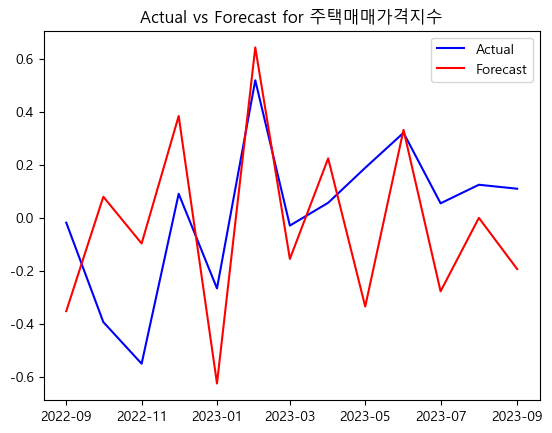

RMSE for 주택매매가격지수: 0.3169553271728618


In [23]:
from sklearn.metrics import mean_squared_error

# Extract and plot the forecast for '주택매매가격지수'
forecast_housing_price = forecast_df['주택매매가격지수']
X_test_diff2_housing_price = X_test_diff2['주택매매가격지수']

# Plot the forecast
plt.plot(X_test_diff2_housing_price.index, X_test_diff2_housing_price, label='Actual', color='blue')
plt.plot(forecast_housing_price.index, forecast_housing_price, label='Forecast', color='red')
plt.legend()
plt.title('Actual vs Forecast for 주택매매가격지수')
plt.show()

# Calculate RMSE
rmse_housing_price = np.sqrt(mean_squared_error(X_test_diff2_housing_price, forecast_housing_price))
print(f'RMSE for 주택매매가격지수: {rmse_housing_price}')


In [24]:
print(data.iloc[-len(X_test_diff2):, 25])

Date
2022-09-01    100.568
2022-10-01    100.014
2022-11-01     98.909
2022-12-01     97.894
2023-01-01     96.612
2023-02-01     95.848
2023-03-01     95.054
2023-04-01     94.316
2023-05-01     93.766
2023-06-01     93.536
2023-07-01     93.360
2023-08-01     93.308
2023-09-01     93.365
Name: 주택매매가격지수, dtype: float64


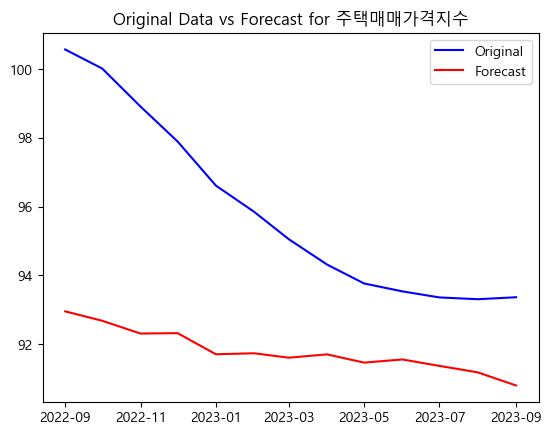

RMSE for 주택매매가격지수 (Original Data): 4.559181377043962


In [25]:
from sklearn.metrics import mean_squared_error

# Reverse the 2nd-order differencing for the forecast of '주택매매가격지수'
forecast_diff2_housing_price = forecast_df['주택매매가격지수']
forecast_diff1_housing_price = np.cumsum(forecast_diff2_housing_price)  # Reverse 2nd-order differencing
forecast_original_housing_price = np.cumsum(forecast_diff1_housing_price) + data['주택매매가격지수'].iloc[-2]  # Reverse 1st-order differencing

# Plot the original data and the forecast
plt.plot(data.iloc[-len(X_test_diff2):, 25].index, data.iloc[-len(X_test_diff2):, 25], label='Original', color='blue')
plt.plot(forecast_original_housing_price.index, forecast_original_housing_price, label='Forecast', color='red')
plt.legend()
plt.title('Original Data vs Forecast for 주택매매가격지수')
plt.show()

# Calculate RMSE for the original data
rmse_original_housing_price = np.sqrt(mean_squared_error(data['주택매매가격지수'].iloc[-len(X_test_diff2):], forecast_original_housing_price))
print(f'RMSE for 주택매매가격지수 (Original Data): {rmse_original_housing_price}')


In [26]:
forecast_original_housing_price

Date
2022-09-01    92.955418
2022-10-01    92.681552
2022-11-01    92.310134
2022-12-01    92.322037
2023-01-01    91.708310
2023-02-01    91.736425
2023-03-01    91.608760
2023-04-01    91.704533
2023-05-01    91.464904
2023-06-01    91.556318
2023-07-01    91.369718
2023-08-01    91.182174
2023-09-01    90.800522
Name: 주택매매가격지수, dtype: float64

In [27]:
from sklearn.decomposition import PCA

# PCA를 사용하여 주택매매가격지수에 대한 변수 중요도 확인
pca = PCA()
pca.fit(endogeneous_var.iloc[:,:-1])  # endogeneous_var: 주택매매가격지수,외생변수를 제외한 변수들

# 주성분(PC)에 대한 설명된 분산 비율 확인
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
print(explained_variance_ratio)

# 변수 중요도 확인
variable_importance = pca.components_[0]  # 첫 번째 주성분에 대한 변수 중요도
print("Variable Importance:")
print(variable_importance)

# 주택매매가격지수에 대한 변수 중요도 확인
housing_price_importance = variable_importance[0]
print("Housing Price Importance:", housing_price_importance)

variable_names = endogeneous_var.iloc[:,:-1].columns

# 주택매매가격지수에 대한 변수 중요도와 변수 이름을 연결하여 출력
variable_importance_dict = dict(zip(variable_names, variable_importance))
print("Variable Importance:")
for var, importance in variable_importance_dict.items():
    print(f"{var}: {importance}")

Explained Variance Ratio:
[2.80788841e-01 2.14333244e-01 1.39709359e-01 7.97646213e-02
 6.42681906e-02 6.12996269e-02 4.47925530e-02 4.28538066e-02
 2.76252473e-02 1.92340681e-02 9.24991744e-03 7.18922079e-03
 3.80904590e-03 1.81585009e-03 1.47089744e-03 6.01651284e-04
 4.08707326e-04 3.64268785e-04 1.53551304e-04 1.09737189e-04
 7.51593765e-05 4.39764811e-05 2.55262699e-05 1.29318994e-05]
Variable Importance:
[-5.60867863e-01 -7.60252200e-01  1.30449651e-03 -1.80880912e-01
 -1.73331808e-01 -1.33511479e-01  7.51482917e-03  4.94541634e-03
 -4.36224637e-04  7.43358815e-02 -5.79845763e-02 -1.44783112e-04
 -6.47052521e-03  7.83425574e-03  6.21056905e-03  8.35607208e-03
  5.48319573e-03 -7.43958448e-03 -2.19733156e-02  1.04219850e-01
  3.68971008e-02 -6.98216758e-02 -9.68910223e-04 -2.60099230e-03]
Housing Price Importance: -0.5608678627013636
Variable Importance:
주택건설인허가실적: -0.5608678627013636
전산업생산지수: -0.7602521997875321
주택담보대출금리: 0.001304496514696768
건설업_업황전망: -0.180880911663375
건설업_매출전망

In [201]:
endogeneous_var.iloc[:,:-1].columns

Index(['주택건설인허가실적', '전산업생산지수', '예금은행대출금리', '건설업_업황전망', '건설업_매출전망',
       '건설업_자금사전전망', '소비자물가지수', '생산자물가지수', '미분양주택현황', '실업률', '고용률', '경제심리지수'],
      dtype='object')

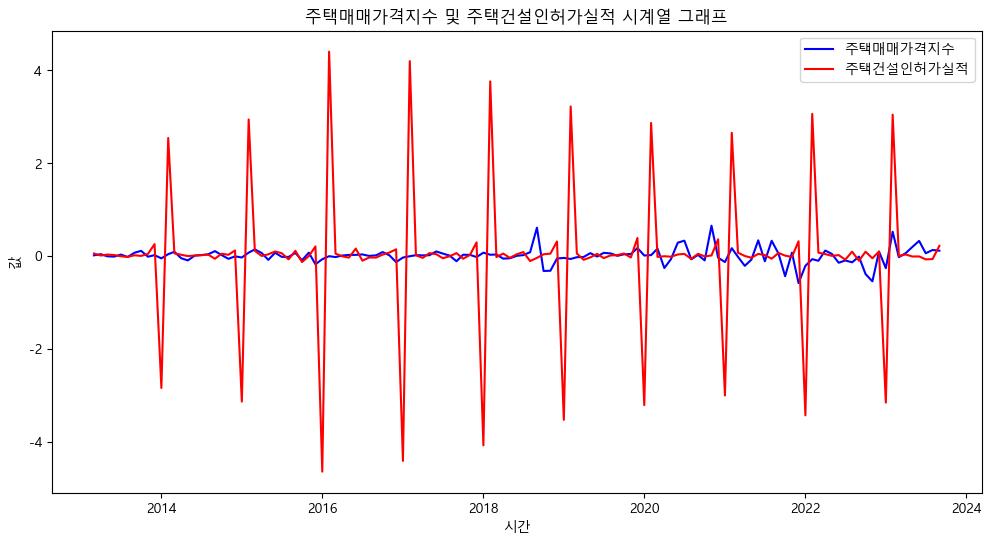

In [28]:
import matplotlib.pyplot as plt

# 주택매매가격지수 및 주택건설인허가실적의 시간에 따른 그래프
plt.figure(figsize=(12, 6))
plt.plot(diff2_data.index, diff2_data['주택매매가격지수'], label='주택매매가격지수', color='blue')
plt.plot(diff2_data.index, diff2_data['주택건설인허가실적'], label='주택건설인허가실적', color='red')
plt.title('주택매매가격지수 및 주택건설인허가실적 시계열 그래프')
plt.xlabel('시간')
plt.ylabel('값')
plt.legend()
plt.show()


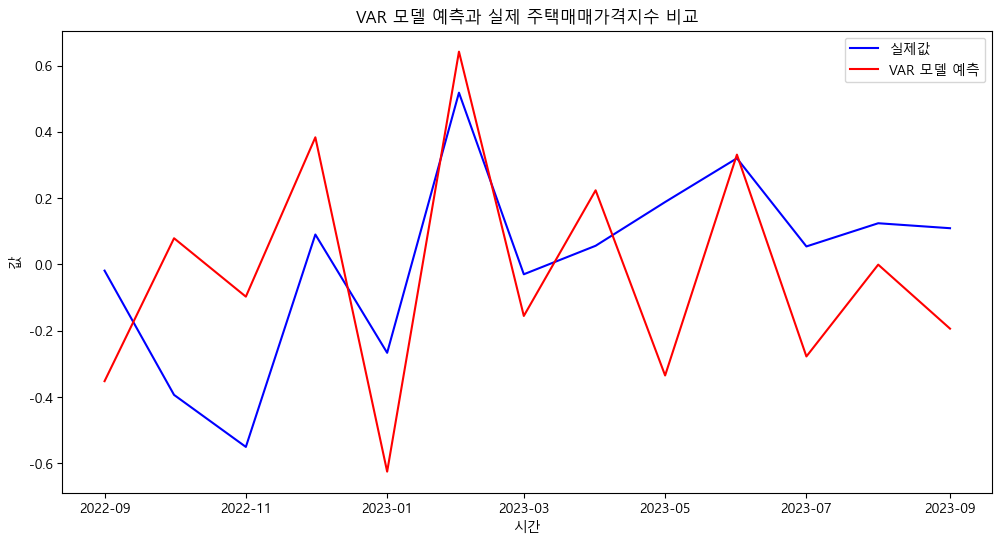

In [29]:
# 예측과 실제 주택매매가격지수 비교
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(X_test_diff2):], X_test_diff2['주택매매가격지수'], label='실제값', color='blue')
plt.plot(forecast_df.index, forecast_df['주택매매가격지수'], label='VAR 모델 예측', color='red')
plt.title('VAR 모델 예측과 실제 주택매매가격지수 비교')
plt.xlabel('시간')
plt.ylabel('값')
plt.legend()
plt.show()


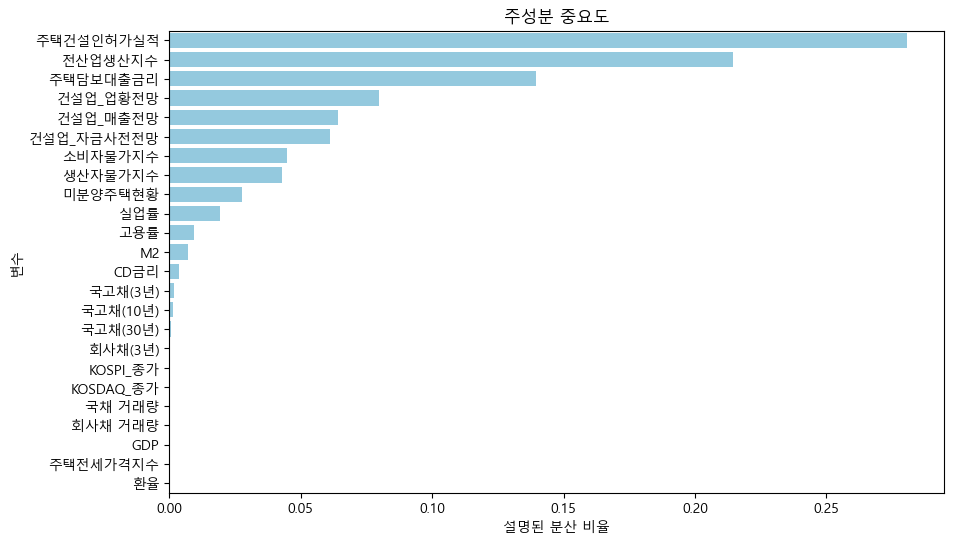

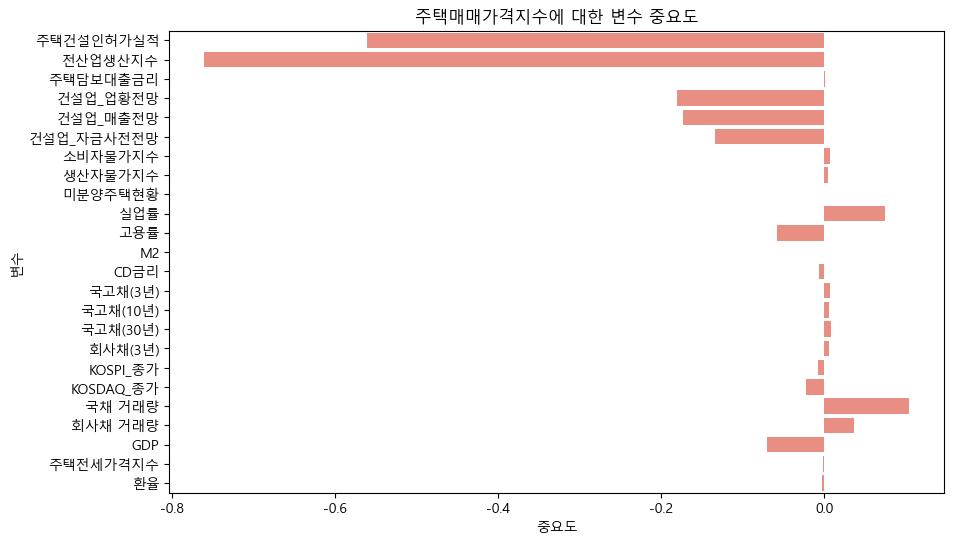

In [30]:
import seaborn as sns

# 주성분 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=explained_variance_ratio, y=endogeneous_var.iloc[:,:-1].columns, color='skyblue')
plt.title('주성분 중요도')
plt.xlabel('설명된 분산 비율')
plt.ylabel('변수')
plt.show()

# 주택매매가격지수에 대한 변수 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=variable_importance, y=endogeneous_var.iloc[:,:-1].columns, color='salmon')
plt.title('주택매매가격지수에 대한 변수 중요도')
plt.xlabel('중요도')
plt.ylabel('변수')
plt.show()


#### VECM

In [205]:
# train, test 분리
X_train = data[:int(len(data)*0.9)]
X_test = data[int(len(data)*0.9):]

In [206]:
from statsmodels.tsa.vector_ar import vecm
## Statistical Test for Cointegration (VECM 공적분 테스트)
## 귀무가설 : 공적분 특성없다, 대립가설 : 공적분 특성 있다

vec_rank = vecm.select_coint_rank(X_train, det_order = 1, k_ar_diff = 1, signif=0.01)
print(vec_rank.summary())

Johansen cointegration test using trace test statistic with 1% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0  14          823.7            nan
  1  14          661.4            nan
  2  14          527.8          375.3
  3  14          425.4          322.4
  4  14          334.9          273.4
  5  14          261.8          228.2
  6  14          192.4          187.2
  7  14          142.0          150.1
-------------------------------------


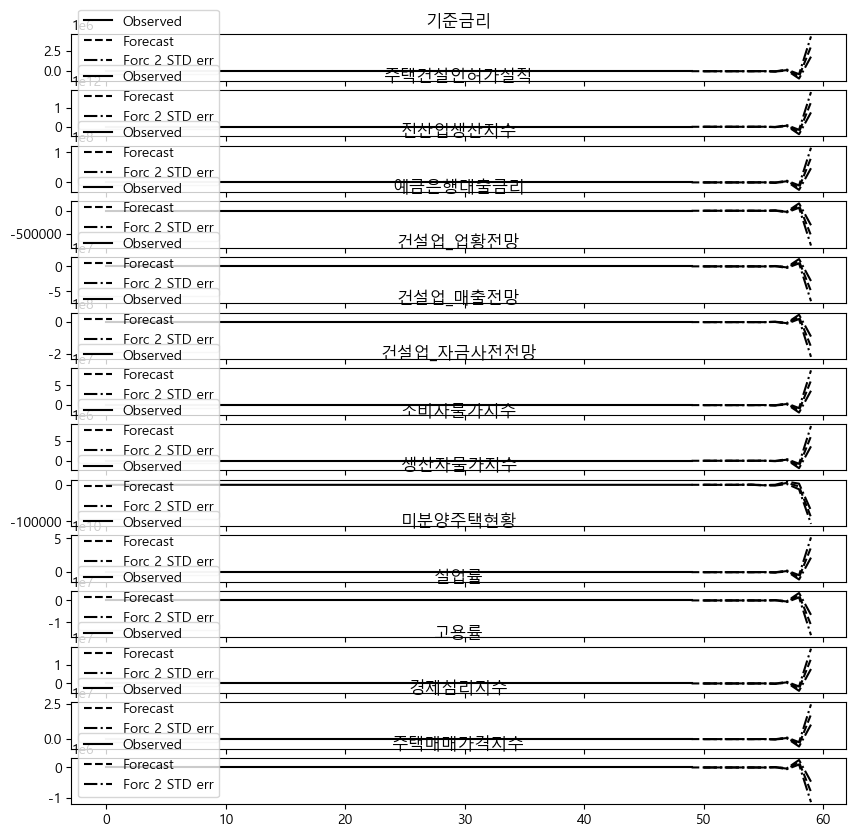

In [207]:
vecm = vecm.VECM(endog = X_train, k_ar_diff = 9, coint_rank = 3, deterministic = 'ci')
vecm_fit = vecm.fit()
vecm_fit.predict(steps=10)
vecm_fit.plot_forecast(steps=10, n_last_obs=50)

In [208]:
import pandas as pd
import statsmodels.api as sm

# 'Date' 열을 인덱스로 설정
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# VAR 모델을 위한 데이터 선택
var_data = data[['주택매매가격지수', '기준금리', '주택건설인허가실적', '전산업생산지수', '예금은행대출금리', '건설업_업황전망',
       '건설업_매출전망', '건설업_자금사전전망', '소비자물가지수', '생산자물가지수', '미분양주택현황', '실업률', '고용률',
       '경제심리지수']]

# VAR 모델 생성
model = sm.tsa.VAR(var_data)

# AIC 기준으로 최적의 시차 선택
best_order = model.select_order()

# 최적의 시차로 모델 피팅
result = model.fit(best_order.aic)


KeyError: 'Date'

In [ ]:
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 26, Nov, 2023
Time:                     12:42:31
--------------------------------------------------------------------
No. of Equations:         14.0000    BIC:                    46.6082
Nobs:                     122.000    HQIC:                   27.6914
Log likelihood:          -1937.46    FPE:                1.97952e+10
AIC:                      14.7527    Det(Omega_mle):     4.83175e+06
--------------------------------------------------------------------
Results for equation 주택매매가격지수
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                33.794905        15.488375            2.182           0.029
L1.주택매매가격지수           1.091246         0.174444            6.256           0.000
L1.기준금리               0.100756         0.257017          

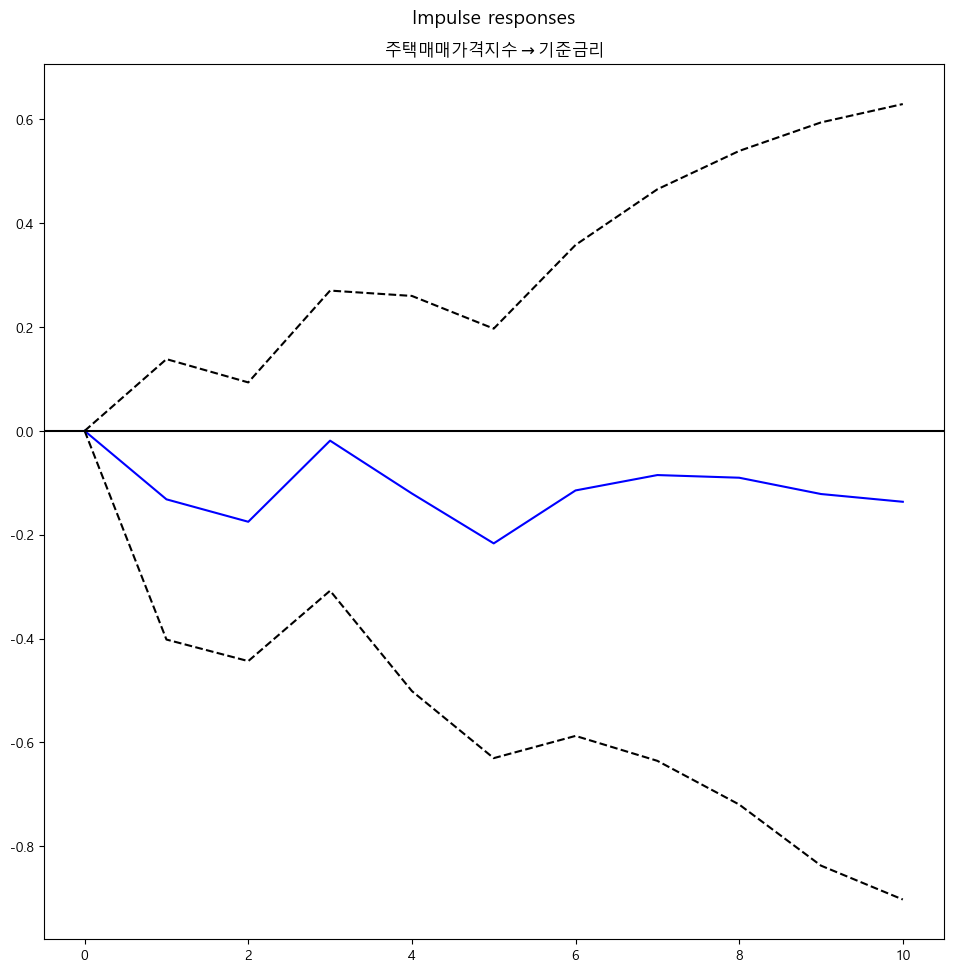

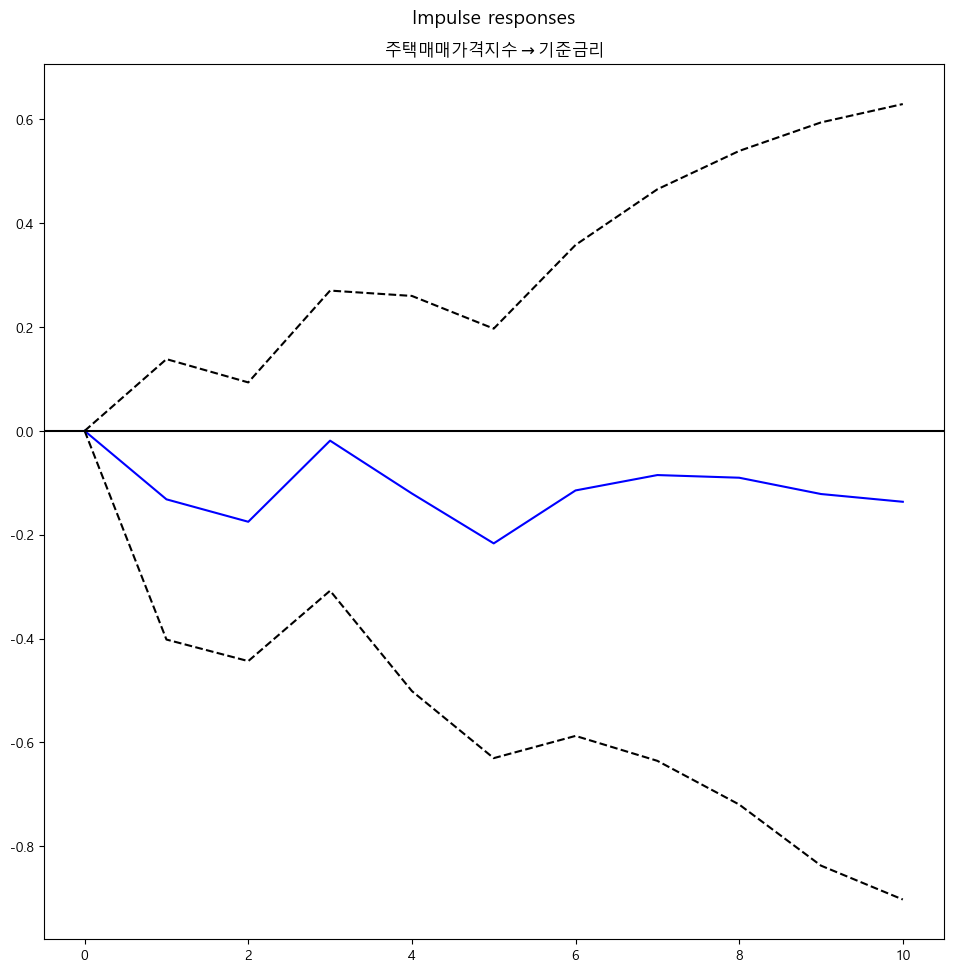

In [ ]:
result.irf().plot(impulse='주택매매가격지수', response='기준금리')

### ARIMA

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [ ]:
X_train = data['주택매매가격지수'][:int(len(data)*0.9)] # 2013-01 ~ 2023-08
X_test = data['주택매매가격지수'][int(len(data)*0.9):] # 2023-09 ~ 2023-09

In [ ]:
index_13_months = pd.date_range(X_train.index[-1], freq='M', periods=13, tz=None)
index_13_months

DatetimeIndex(['2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30',
               '2022-12-31', '2023-01-31', '2023-02-28', '2023-03-31',
               '2023-04-30', '2023-05-31', '2023-06-30', '2023-07-31',
               '2023-08-31'],
              dtype='datetime64[ns]', freq='M')

In [ ]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
aic = []
for param in pdq:
    try:
        model_arima = ARIMA(X_train, order=param)
        model_arima_fit = model_arima.fit()
        aic.append(model_arima_fit.aic)
    except:
        continue
aic_df = pd.DataFrame({'pdq': pdq, 'AIC': aic})
print(aic_df)

           pdq         AIC
0    (0, 0, 0)  835.196939
1    (0, 0, 1)  684.574143
2    (0, 0, 2)  542.250602
3    (0, 0, 3)  420.698571
4    (0, 0, 4)  325.775070
..         ...         ...
120  (4, 4, 0)  -22.971922
121  (4, 4, 1)  -65.020539
122  (4, 4, 2)  -77.859607
123  (4, 4, 3)  -52.611037
124  (4, 4, 4)  -72.770876

[125 rows x 2 columns]


In [ ]:
aic_df['AIC'] = abs(aic_df['AIC'])

In [ ]:
aic_df[aic_df['AIC']==min(abs(aic_df['AIC']))]

,pdq,AIC
70,"(2, 4, 0)",1.461771


The RMSE of auto-arima is 5.148891463094865


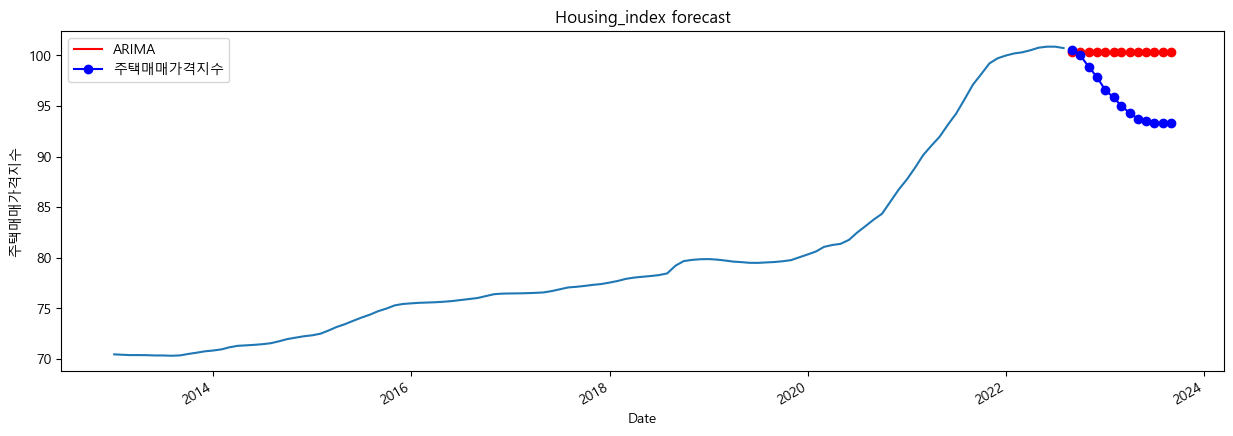

In [ ]:
model_arima = ARIMA(X_train, order = (2,4,0))
model_arima_fit = model_arima.fit()

fcast1 = model_arima_fit.forecast(13)[0]
fcast1 = pd.Series(fcast1, index=index_4_months)
fcast1 = fcast1.rename('ARIMA')

fix, ax = plt.subplots(figsize=(15,5))
chart = sns.lineplot(x='Date', y='주택매매가격지수', data=pd.DataFrame(X_train))
chart.set_title('Housing_index forecast')
fcast1.plot(ax=ax, color='red', marker='o', legend=True)
X_test.plot(ax=ax, color='blue', marker='o', legend=True)

print('The RMSE of auto-arima is', mean_squared_error(X_test.values, fcast1.values)**0.5)

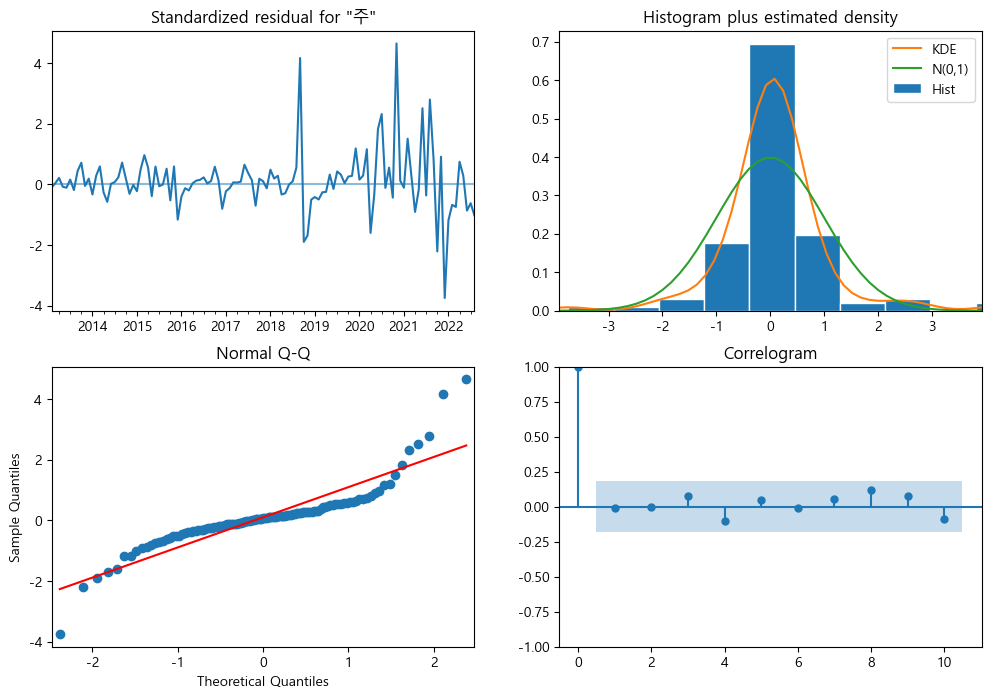

In [ ]:
model_arima_fit.plot_diagnostics(figsize=(12, 8))
plt.show()

The RMSE of auto-arima is 4.369083238896016


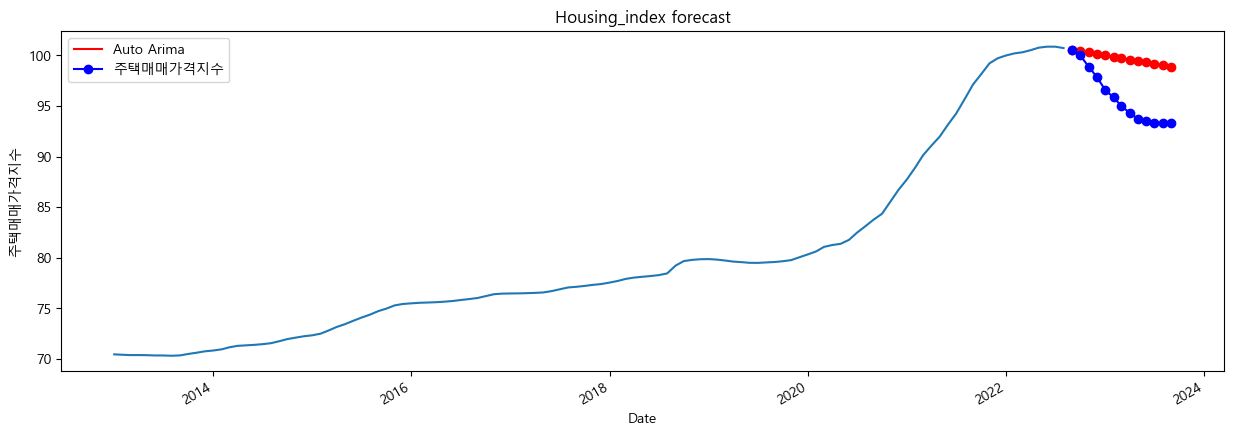

In [ ]:
auto_arima_model = pm.auto_arima(X_train, seasonal=False, m=12)

fcast2 = auto_arima_model.predict(13)
fcast2=fcast2.rename("Auto Arima")

fix, ax = plt.subplots(figsize=(15,5))
chart = sns.lineplot(x='Date', y='주택매매가격지수', data=pd.DataFrame(X_train))
chart.set_title('Housing_index forecast')
fcast2.plot(ax=ax, color='red', marker='o', legend=True)
X_test.plot(ax=ax, color='blue', marker='o', legend=True)

print('The RMSE of auto-arima is', mean_squared_error(X_test.values, fcast2.values)**0.5)


In [ ]:
print('(p,d,q) of auto_arima is', auto_arima_model.aic)

(p,d,q) of auto_arima is <bound method ARIMA.aic of ARIMA(order=(0, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)>


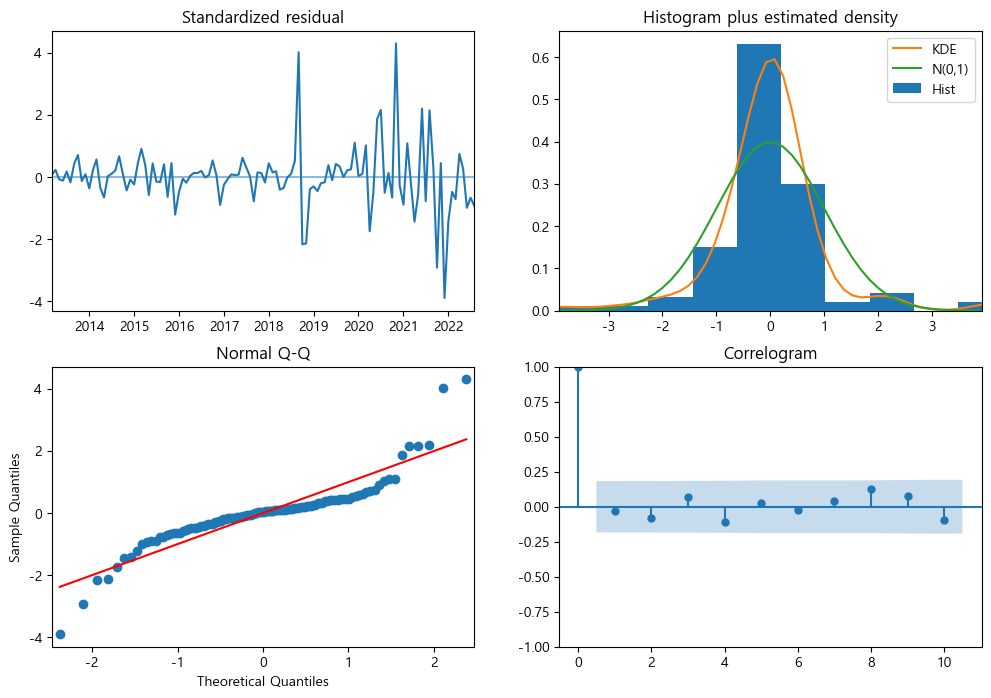

In [ ]:
auto_arima_model.plot_diagnostics(figsize=(12, 8))
plt.show()